In [1]:
from sklearn.cluster import KMeans
import numpy as np

from result_collection.helper_func import *

folder="results/lola1_random_init_policy_robustness/"
agents="LOLA1"
game = "IPD"

results = collect_experiment_epoch_policies(folder, "*{0}.json".format(game))

Loading... results/lola1_random_init_policy_robustness/R00/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R01/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R02/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R03/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R04/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R05/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R06/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R07/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R08/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R09/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R10/lola1_vs_lola1_IPD.json
Loading... results/lola1_random_init_policy_robustness/R11/lola1_vs_lola1_IPD.json
Load

In [6]:
import re

randomness = np.linspace(0, 0.5, 51)

keys = ["R=[{0:.2f}, {1:.2f}]".format(0.5-r, 0.5+r) for r in randomness]
sorted_results = [None for _ in randomness]

def index(filename):
    return int(re.findall('R\d+', filename)[0][1:])

for filename, X in results.items():
    i = index(filename)
    if game in filename and i < len(sorted_results):
        sorted_results[i] = np.reshape(np.array(X), (-1, 20, 10))

n = 4
idx = np.linspace(0, 50, n)
selected_results = []

for i in idx:
    selected_results.append(sorted_results[int(i)])

np.shape(np.array(selected_results))

(4, 500, 20, 10)

In [7]:
X = np.array(selected_results)[3][:,19,:]
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [8]:
kmeans.cluster_centers_

array([[0.99971578, 0.99998844, 0.00475886, 0.08208304, 0.00674758,
        0.99979473, 0.99999096, 0.96437716, 0.02341777, 0.03050454],
       [0.9992367 , 0.99994728, 0.03759703, 0.96155706, 0.11860792,
        0.99817935, 0.96798406, 0.97045806, 0.03875246, 0.05937196],
       [0.0065823 , 0.96402438, 0.00123433, 0.99040047, 0.08869839,
        0.99528541, 0.81498637, 0.93448342, 0.86635942, 0.12069121],
       [0.99962122, 0.99997032, 0.0153296 , 0.98107456, 0.00467028,
        0.99072767, 0.99998464, 0.09233776, 0.01413425, 0.02423288],
       [0.97419462, 0.99908381, 0.93836931, 0.94992761, 0.13884392,
        0.00335834, 0.87282981, 0.99722374, 0.00166633, 0.0040872 ],
       [0.0047094 , 0.97953086, 0.03497401, 0.35115379, 0.88128765,
        0.0036706 , 0.93779909, 0.36324009, 0.00149765, 0.83371445],
       [0.86974315, 0.92567227, 0.88776638, 0.99887341, 0.00201856,
        0.99731824, 0.99935267, 0.99474823, 0.00191379, 0.03447999],
       [0.63589967, 0.2275641 , 0.0469638

In [9]:
def SSE(kmeans, X):
    centroids = kmeans.cluster_centers_
    sse = 0
    for i, l in enumerate(kmeans.labels_):
        sse += sum((centroids[l] - X[i])**2)
    return sse
        
SSE(kmeans, X)

98.97690426757792

In [12]:
sses = []
for k in range(2, 25):
    X = np.array(selected_results)[3][:,19,:]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sses.append(SSE(kmeans, X))

sses

[375.8232800094836,
 301.64356619341646,
 245.8394448569518,
 198.50878911989412,
 155.89770858427497,
 138.21328198181223,
 121.83551536572278,
 108.29755835003458,
 98.97690426757792,
 90.87429725889248,
 84.59988474455616,
 79.06663663779611,
 75.3112848301631,
 69.22499347557657,
 66.58476604332205,
 61.28596826945581,
 59.034178720416705,
 55.40056597012899,
 51.74315832804864,
 48.38779474444053,
 47.4838982682207,
 44.58060252375525,
 42.83537619097604]

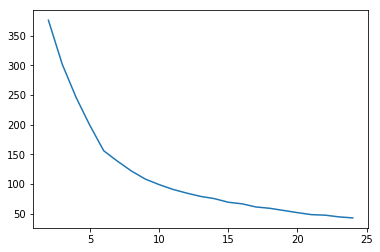

In [14]:
import matplotlib.pyplot as plt

plt.plot(np.arange(2, 25), sses)
plt.show()

Optimal k is probably around 10

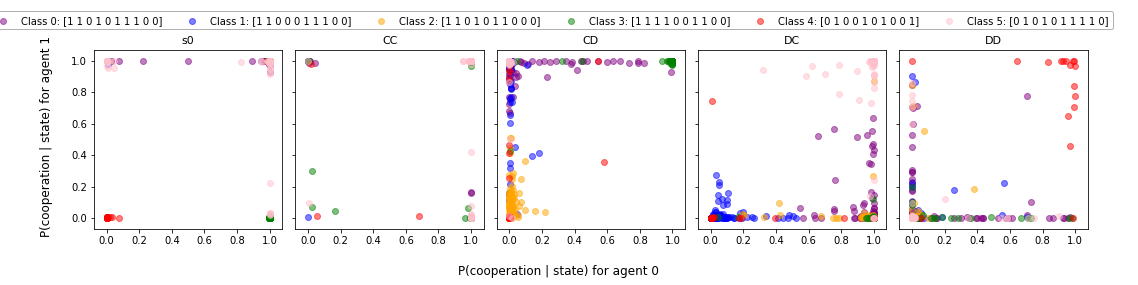

In [481]:
def plot_1ax_policies(X, keys, title, y=None, show=True, figsize=(30, 6), colours=None, filename=None, labels=None):
    rows = 5
    
    fig, axes = plt.subplots(ncols=rows, nrows=1, sharex=True, sharey=True, figsize=figsize)
    fig.text(0.5, 0.96, title, ha='center', fontsize=14)
    fig.text(0.5, 0.02, 'P(cooperation | state) for agent 0', ha='center', fontsize=12)
    fig.text(0.02, 0.5, 'P(cooperation | state) for agent 1', va='center', rotation='vertical', fontsize=12)

    colors = ["purple", "blue", "orange", "green", "red", "pink", "lightblue", "cyan", "lightgreen", "magenta"]
    state = ["s0", "CC", "CD", "DC", "DD"]
    
    unique_lbls = set(list(y))
    for r, ax in enumerate(axes):
        for l in unique_lbls:
            label = "Class: "+ str(l) if labels is None else labels[l]
            x = X[np.where(y == l)]
            ax.scatter(x[:, 0, r], x[:, 1, r], c=colors[l], alpha=0.5, label=label)
        ax.set_title(state[r], fontsize=11)

    plt.subplots_adjust(left=0.07, right=0.99, top=0.80, bottom=0.18, wspace=0.07, hspace=0.27)
    handles, labels = ax.get_legend_handles_labels()

    legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.51, 0.95), ncol=10, borderaxespad=0, fancybox=True)
    frame = legend.get_frame()
    frame.set_edgecolor('black')
    frame.set_alpha(0.3)
    
#     for r, ax in enumerate(axes):
#         X = results[0]
        
#         for i, e in enumerate(X):
#             ax.scatter(e[0, r], e[1, r], s=55, c=colors[kmeans.labels_[i]], alpha=0.5)
#         ax.set_title(state[r], fontsize=11)

#     plt.subplots_adjust(left=0.07, right=0.99, top=0.87, bottom=0.08, wspace=0.07, hspace=0.27)
#     handles, labels = ax.get_legend_handles_labels()

#     legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.51, 0.95), ncol=5, borderaxespad=0, fancybox=True)
#     frame = legend.get_frame()
#     frame.set_edgecolor('black')
#     frame.set_alpha(1)

    plt.show()

X = np.array(selected_results)[3][:,19,:]
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)


labels = []
for i, x in enumerate(kmeans.cluster_centers_):
    labels.append("Class {0}: {1}".format(i, np.where(x > 0.5, 1, 0)))
plot_1ax_policies(np.array(np.reshape(X, (-1, 2, 5))), ["after 1000 runs totally random init"], "", kmeans.labels_, labels=labels, figsize=(15,4))

In [434]:
# Getting to know the policy centroids
for x in kmeans.cluster_centers_:
    print(np.where(x > 0.5, 1, 0))

[1 1 0 1 0 1 1 1 0 0]
[1 1 0 0 0 1 1 1 0 0]
[1 1 0 1 0 1 1 0 0 0]
[1 1 1 1 0 0 1 1 0 0]
[0 1 0 0 1 0 1 0 0 1]
[0 1 0 1 0 1 1 1 1 0]


In [435]:
# Optional
y = kmeans.labels_

In [464]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def _proj(new_X, y, labels):
    colors = ["purple", "blue", "orange", "green", "red", "pink", "lightblue", "cyan", "lightgreen", "magenta"]
    
    unique_lbls = set(list(y))
    fig, ax = plt.subplots()
    for l in unique_lbls:
        label = "Class: "+ str(l) if labels is None else labels[l]
        
        new_x = new_X[np.where(y == l)]
        ax.scatter(new_x[:, 0], new_x[:, 1], c=colors[l], alpha=0.5, label=label)
    
    plt.subplots_adjust(left=0.07, right=0.99, top=0.80, bottom=0.08, wspace=0.07, hspace=0.27)
    handles, labels = ax.get_legend_handles_labels()

    legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.51, 0.95), ncol=5, borderaxespad=0, fancybox=True)
    frame = legend.get_frame()
    frame.set_edgecolor('black')
    frame.set_alpha(0.3)
    plt.show()
    

def pca_proj(X, y, labels=None):
    pca = PCA(n_components=2)
    pca.fit(X)
    new_X = pca.transform(X)
    print("PCA projected data shape: ", np.shape(new_X))
    _proj(new_X, y, labels)
    return pca

    
def lda_proj(init_X, y, labels=None):
    print("data shape: ", np.shape(init_X))
    lda = LinearDiscriminantAnalysis(n_components=2,  store_covariance=True)
    new_X = lda.fit(init_X, y).transform(init_X)
    print("LDA projected data shape: ", np.shape(new_X))
    _proj(new_X, y, labels)
    return lda

PCA projected data shape:  (500, 2)


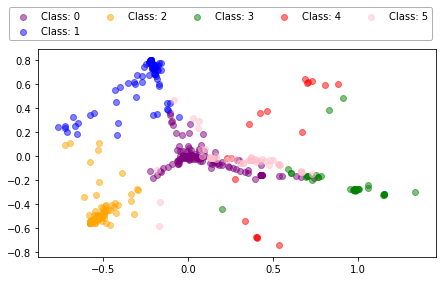

data shape:  (500, 10)
LDA projected data shape:  (500, 2)


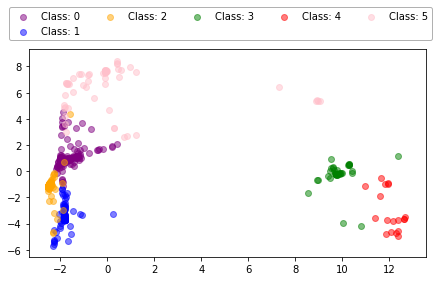

In [437]:
pca_proj(X, y)
lda_proj(X, y)

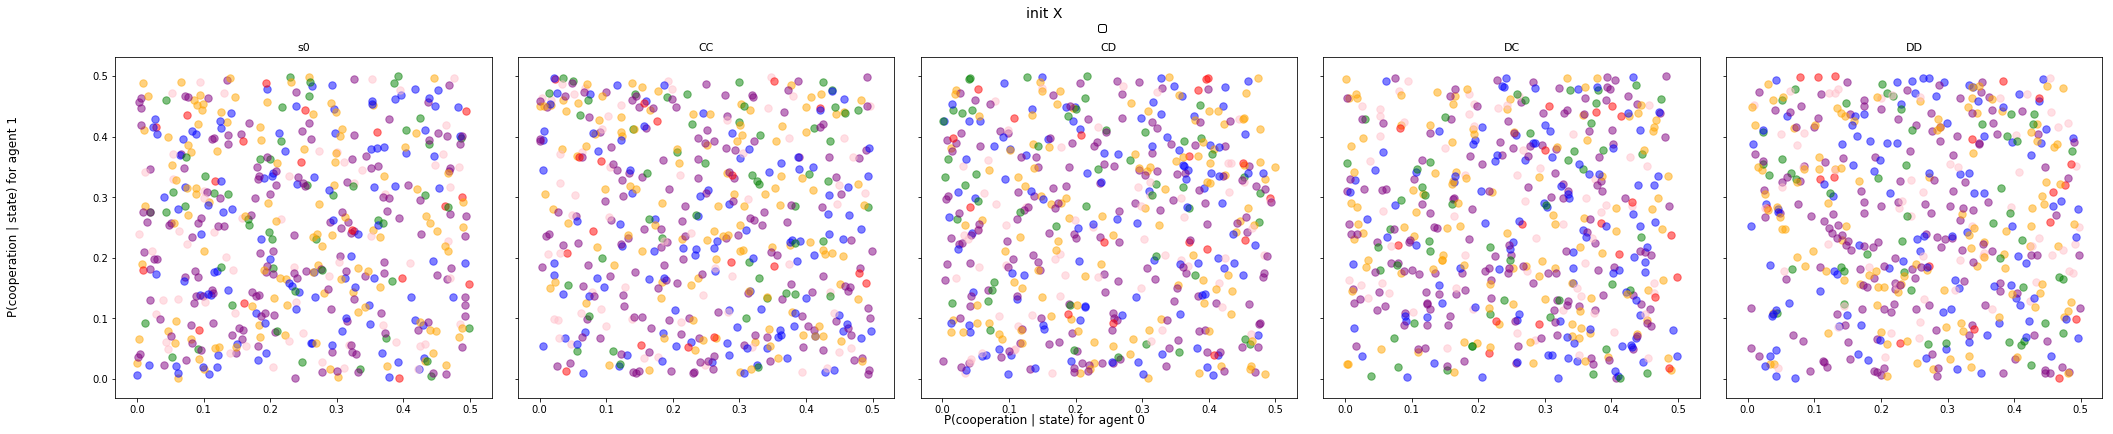

PCA projected data shape:  (500, 2)


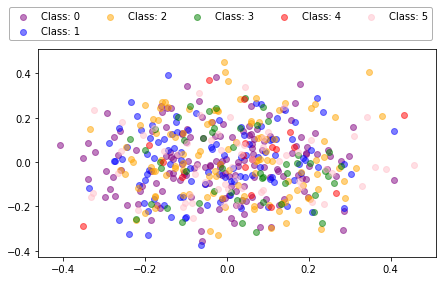

data shape:  (500, 10)
LDA projected data shape:  (500, 2)


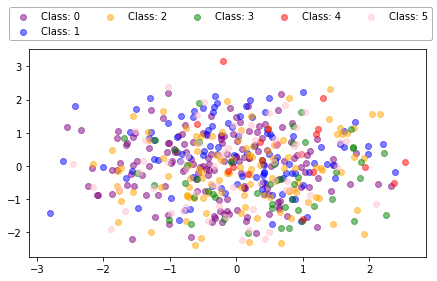

In [423]:
init_X = np.abs(np.array(selected_results)[3][:,0,:] - 0.5)
plot_1ax_policies(np.array([np.reshape(init_X, (-1, 2, 5))]), ["after 1000 runs totally random init"], "init X", y)
pca_proj(init_X, y)
lda_proj(init_X, y)

## Kernal LDA

data shape:  (500, 10)
projected data shape:  (500, 2)


/Users/mateuszochal/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


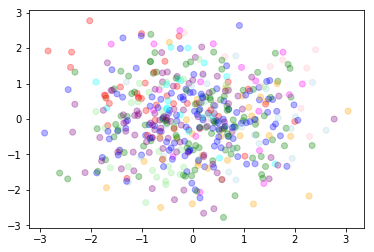

data shape:  (500, 10)
projected data shape:  (500, 2)


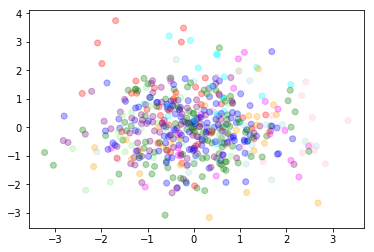

data shape:  (500, 10)
projected data shape:  (500, 2)


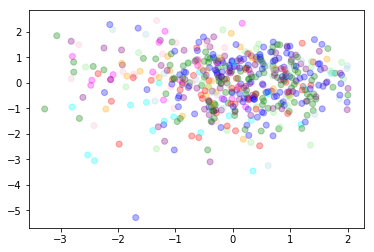

data shape:  (500, 25)
projected data shape:  (500, 2)


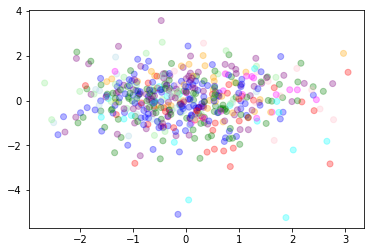

data shape:  (500, 36)
projected data shape:  (500, 2)


/Users/mateuszochal/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


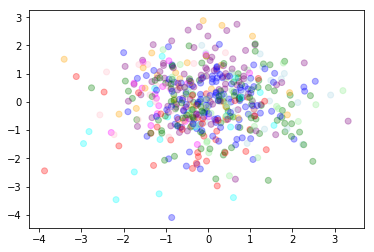

In [266]:
my_init_X_1 = np.array(selected_results)[3][:,0,:]
my_init_X_2 = np.log(np.divide(my_init_X, 1 - my_init_X))
my_init_X_3 = np.abs(my_init_X_2)

my_init_X_4_acc = np.reshape(np.abs(my_init_X_1 - 0.5), (-1, 2, 5))
my_init_X_4 = []
for x in my_init_X_4_acc:
    x0 = x[0]
    x1 = x[1]
    my_init_X_4.append(np.reshape(np.matmul(np.reshape(x0, (5,1)), np.reshape(x1, (1,5))), (25,)))
my_init_X_4 = np.array(my_init_X_4)

my_init_X_5 = []
for x in my_init_X_4_acc:
    x0 = np.append(x[0], [1])
    x1 = np.append(x[1], [1])
    my_init_X_5.append(np.reshape(np.matmul(np.reshape(x0, (6,1)), np.reshape(x1, (1,6))), (36,)))
my_init_X_5 = np.array(my_init_X_5)

    
lda_proj(my_init_X_1, y)
lda_proj(my_init_X_2, y)
lda_proj(my_init_X_3, y)
lda_proj(my_init_X_4, y)
lda_proj(my_init_X_5, y)

D: 3 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


/Users/mateuszochal/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/mateuszochal/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


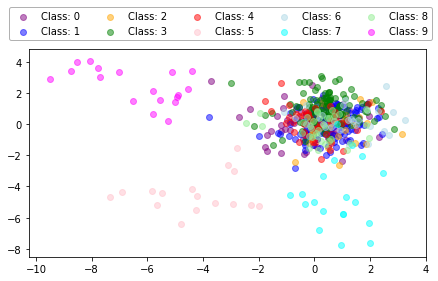

D: 3 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


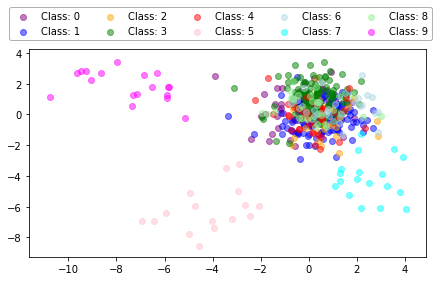

D: 3 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


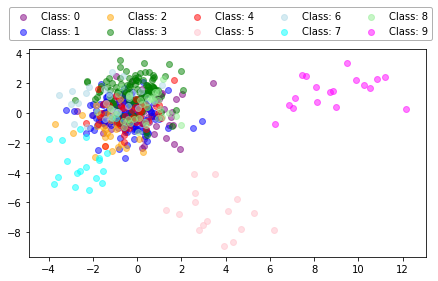

D: 3 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


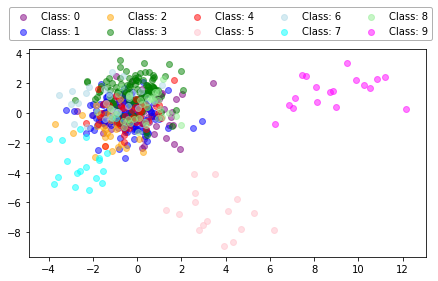

D: 3 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


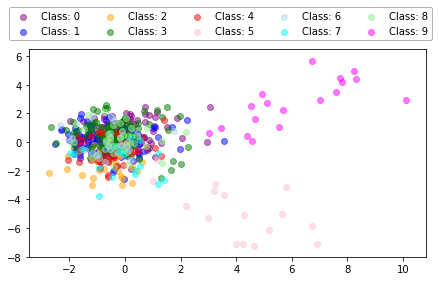

D: 3 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


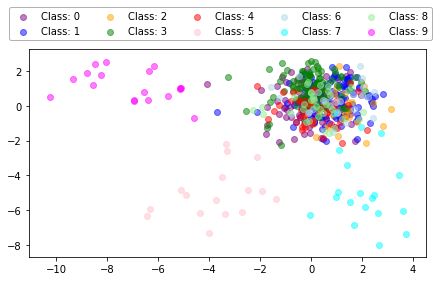

D: 3 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


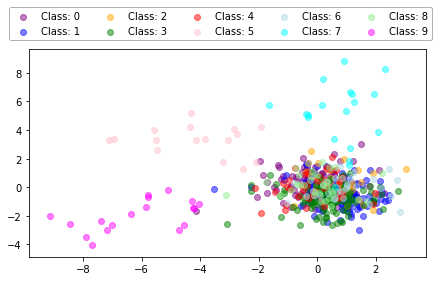

D: 3 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


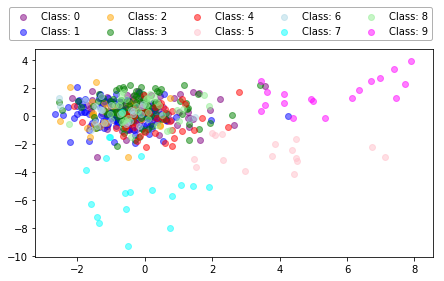

D: 3 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


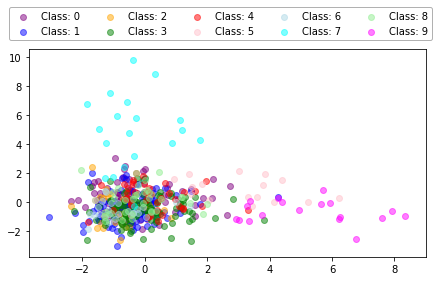

D: 4 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


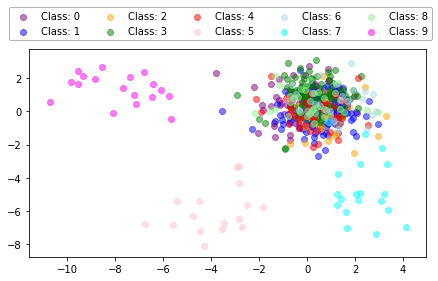

D: 4 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


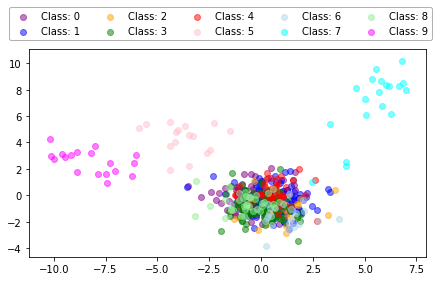

D: 4 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


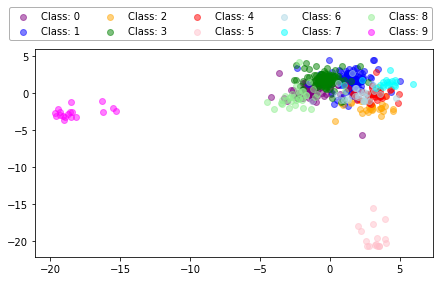

D: 4 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


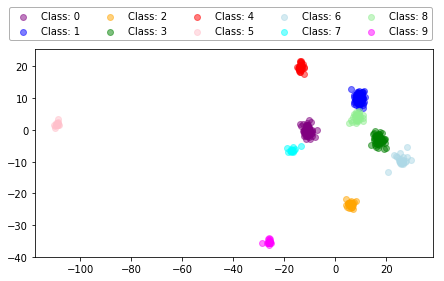

D: 4 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


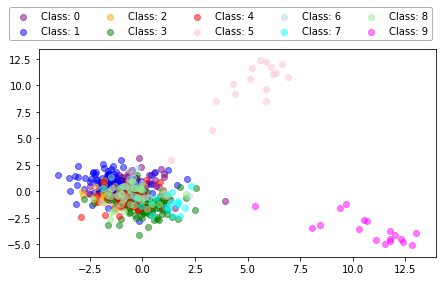

D: 4 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


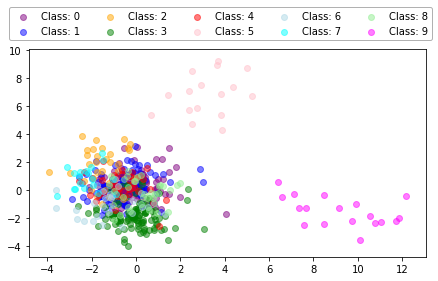

D: 4 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


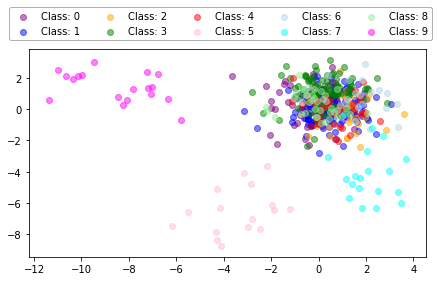

D: 4 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


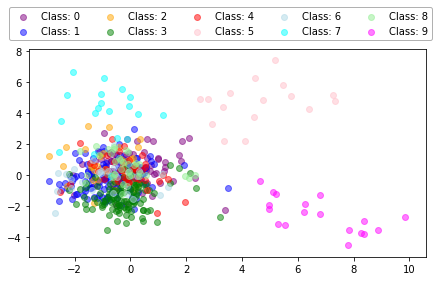

D: 4 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


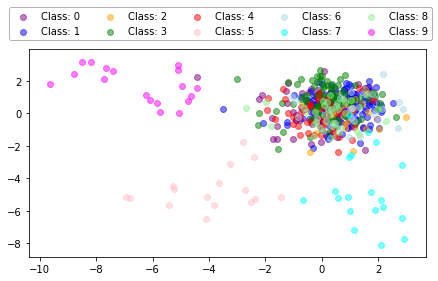

D: 5 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


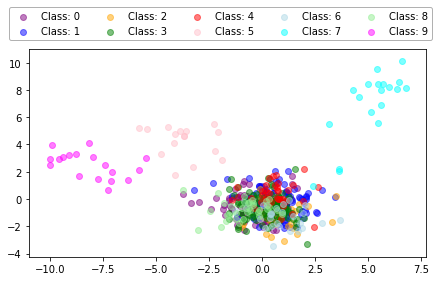

D: 5 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


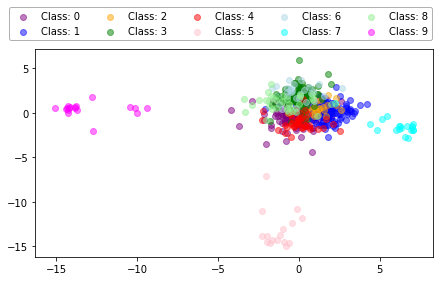

D: 5 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


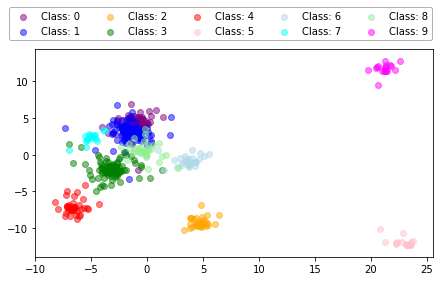

D: 5 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


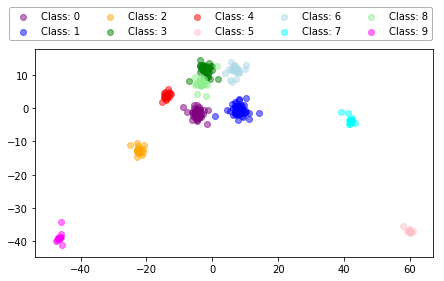

D: 5 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


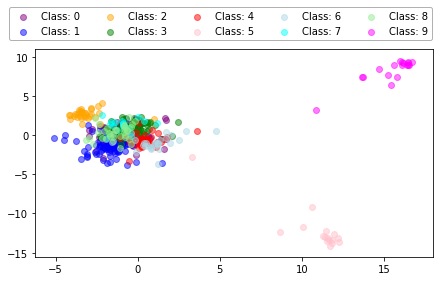

D: 5 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


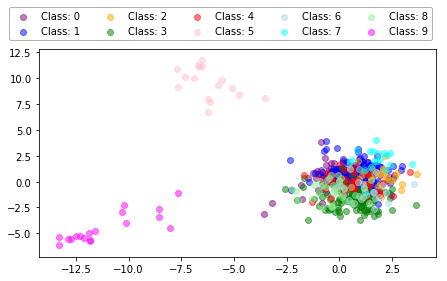

D: 5 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


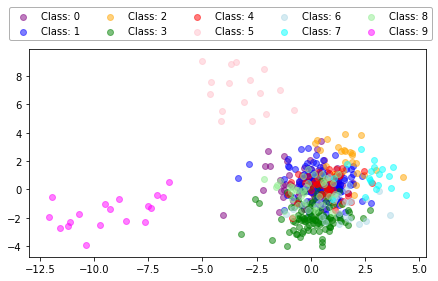

D: 5 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


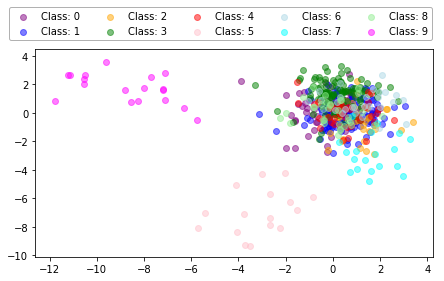

D: 5 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


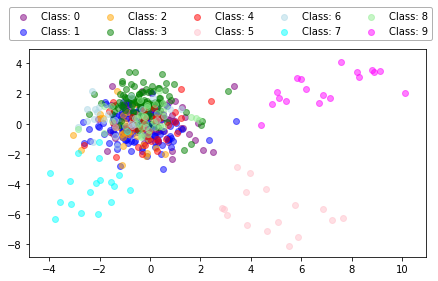

D: 6 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


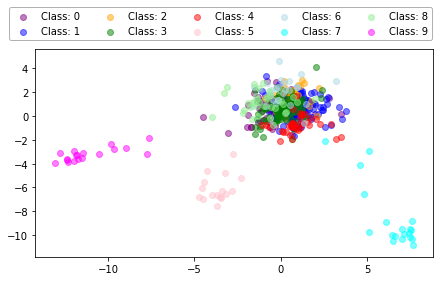

D: 6 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


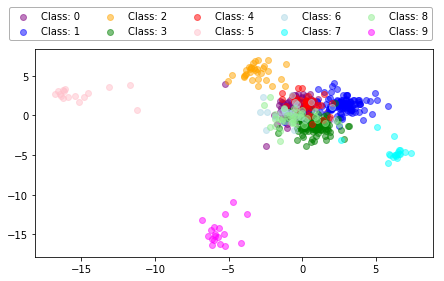

D: 6 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


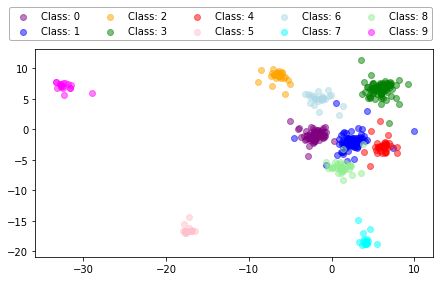

D: 6 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


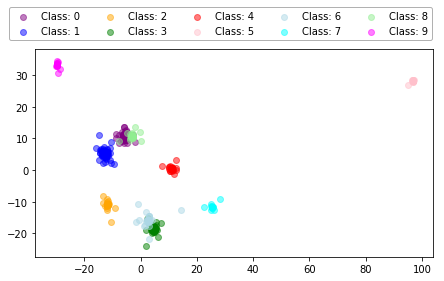

D: 6 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


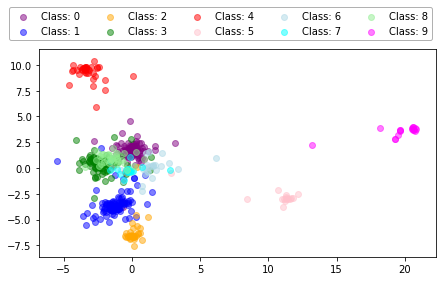

D: 6 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


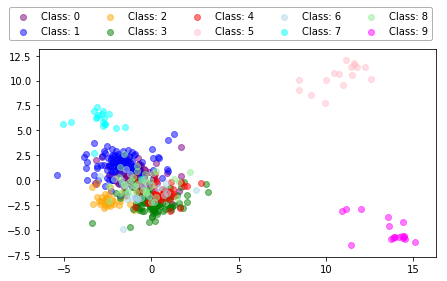

D: 6 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


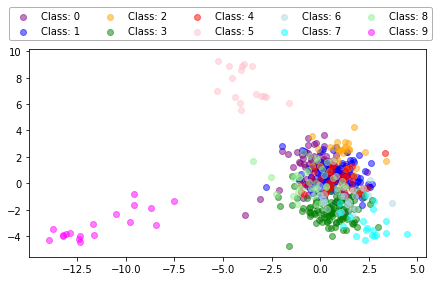

D: 6 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


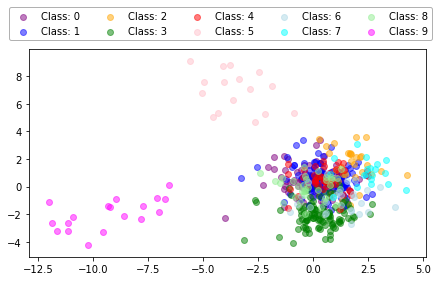

D: 6 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


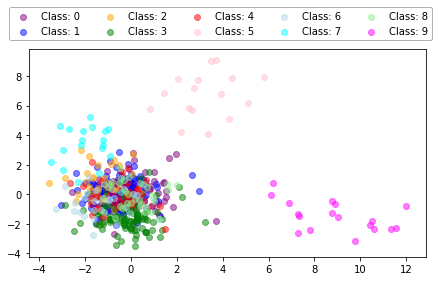

D: 7 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


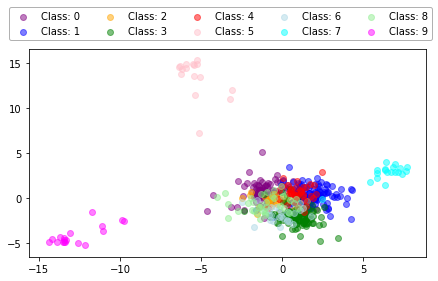

D: 7 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


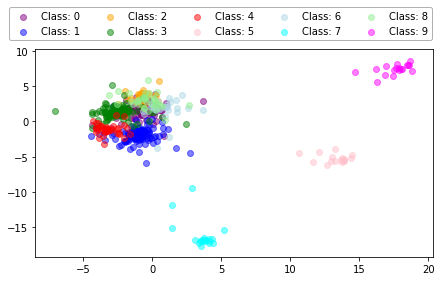

D: 7 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


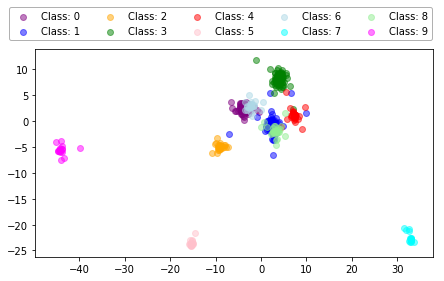

D: 7 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


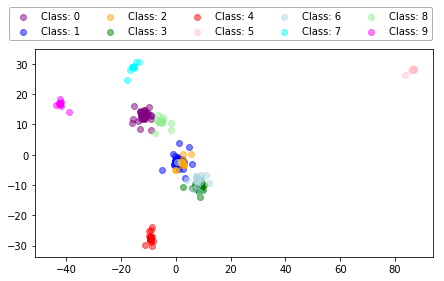

D: 7 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


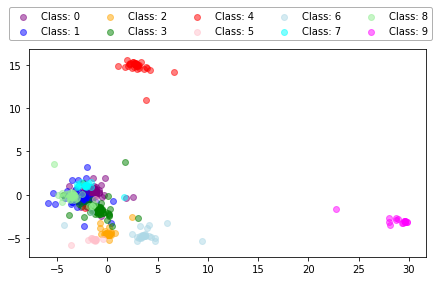

D: 7 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


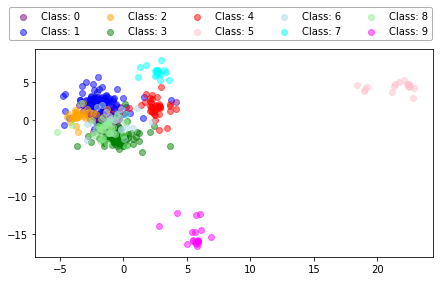

D: 7 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


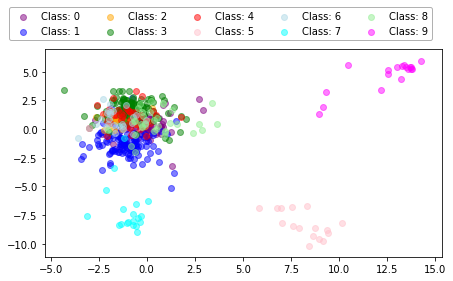

D: 7 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


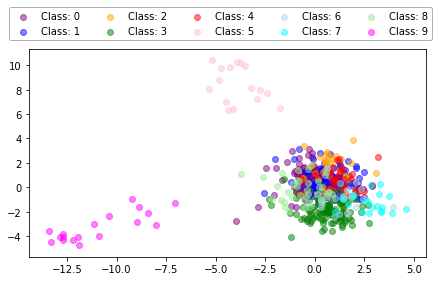

D: 7 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


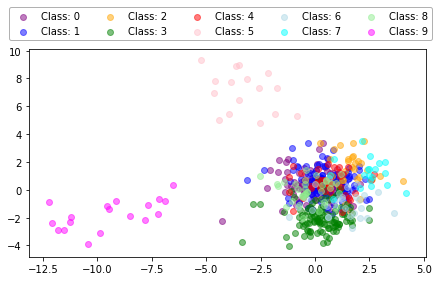

D: 8 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


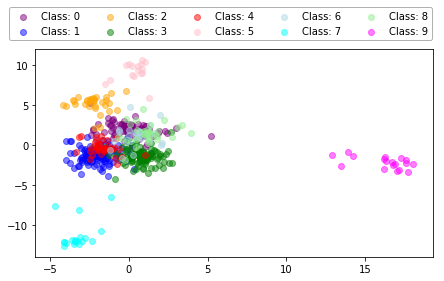

D: 8 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


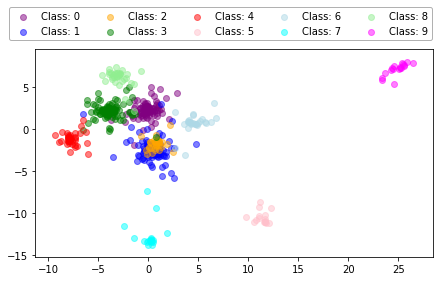

D: 8 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


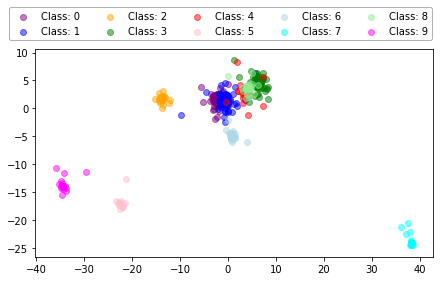

D: 8 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


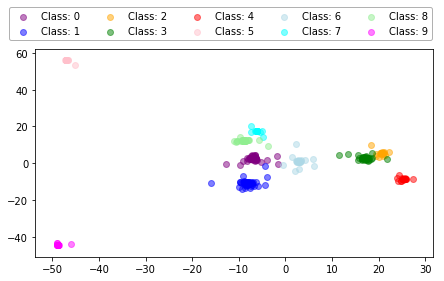

D: 8 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


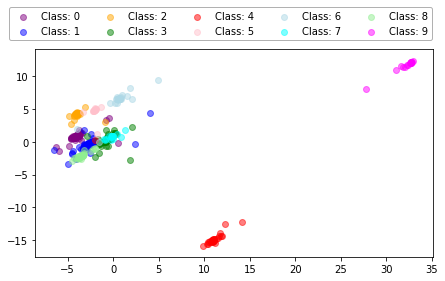

D: 8 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


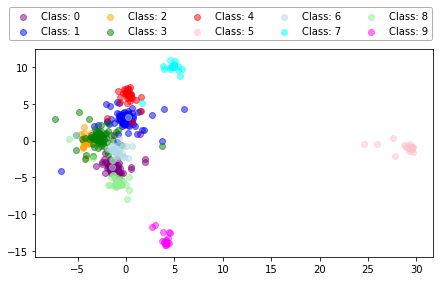

D: 8 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


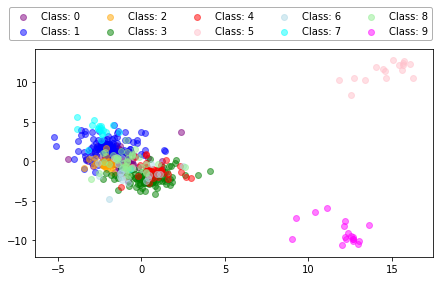

D: 8 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


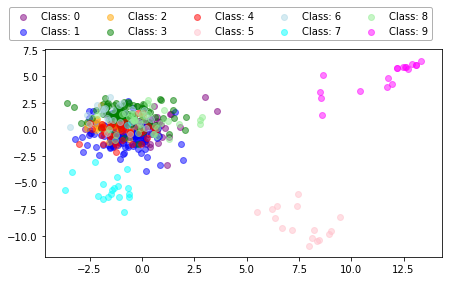

D: 8 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


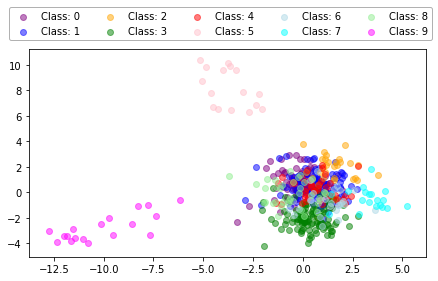

D: 9 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


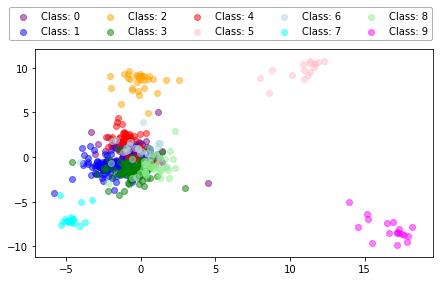

D: 9 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


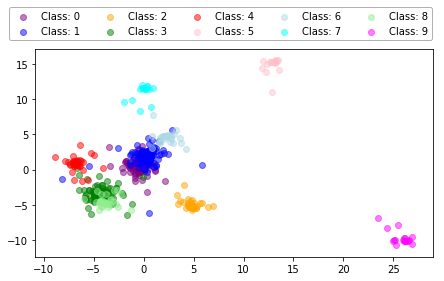

D: 9 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


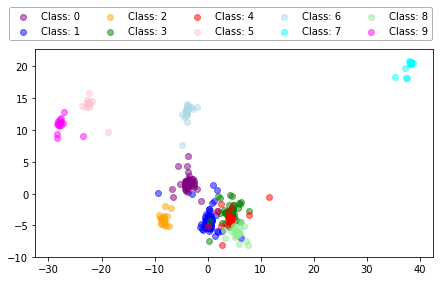

D: 9 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


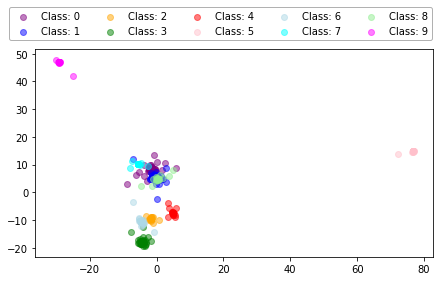

D: 9 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


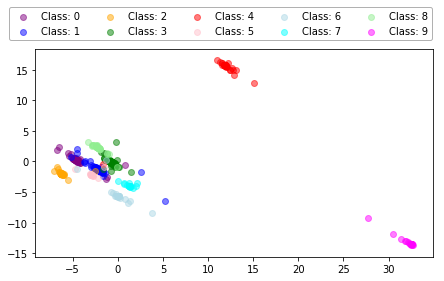

D: 9 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


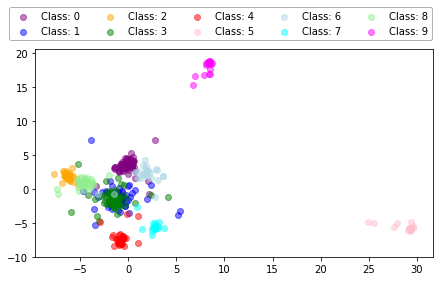

D: 9 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


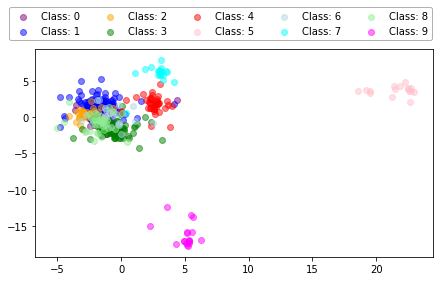

D: 9 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


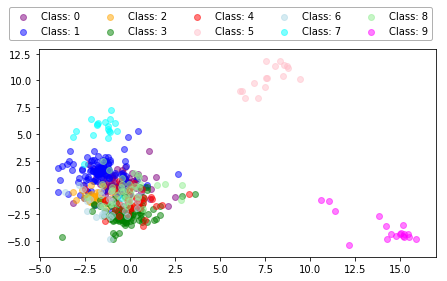

D: 9 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


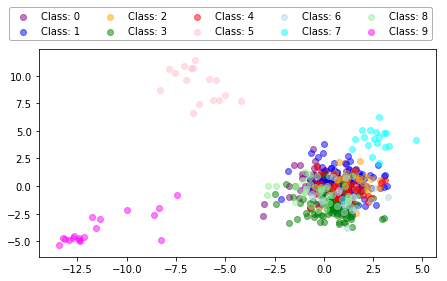

D: 10 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


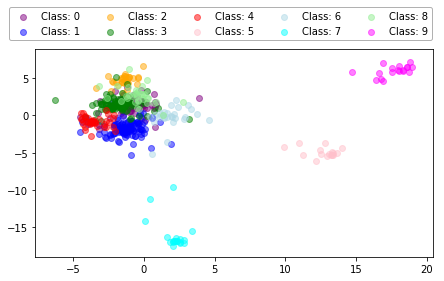

D: 10 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


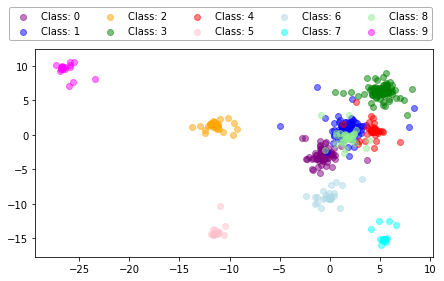

D: 10 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


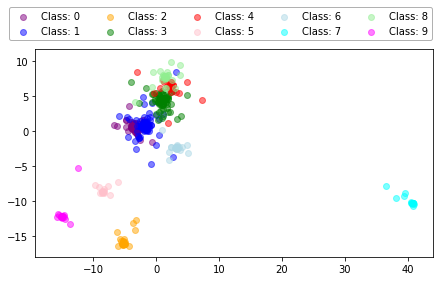

D: 10 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


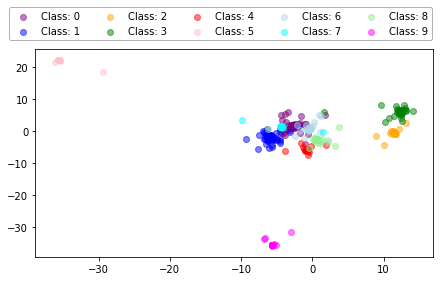

D: 10 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


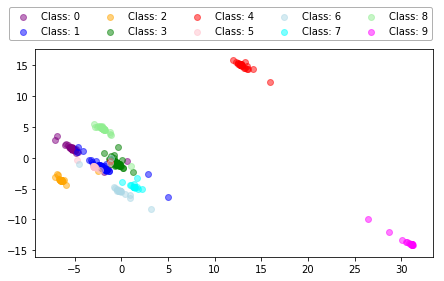

D: 10 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


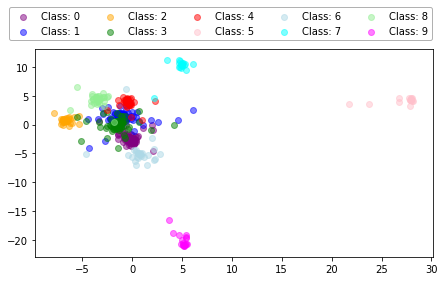

D: 10 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


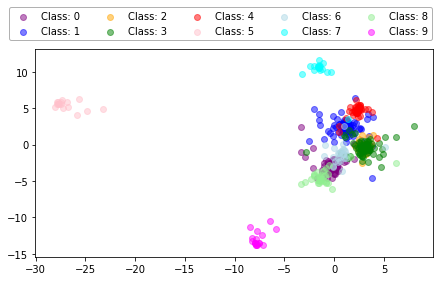

D: 10 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


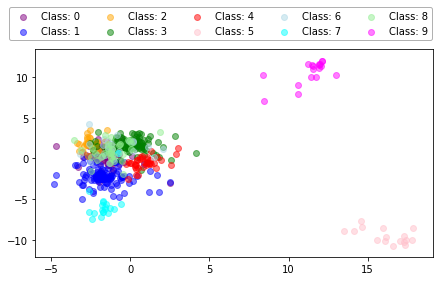

D: 10 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


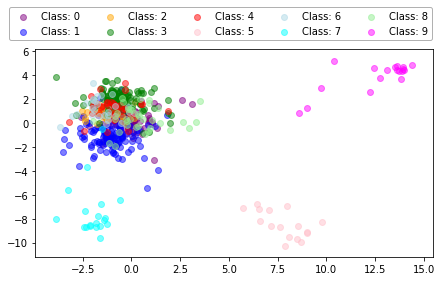

D: 15 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


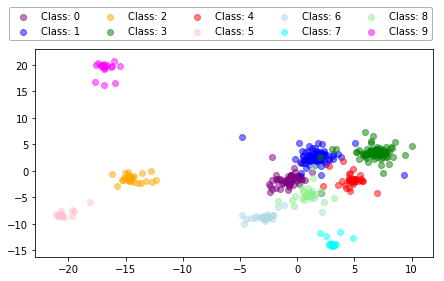

D: 15 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


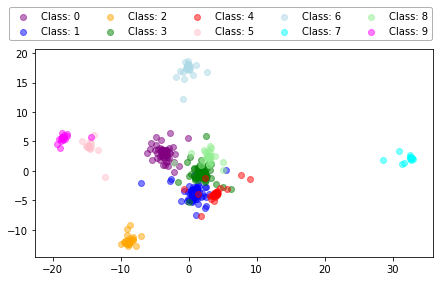

D: 15 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


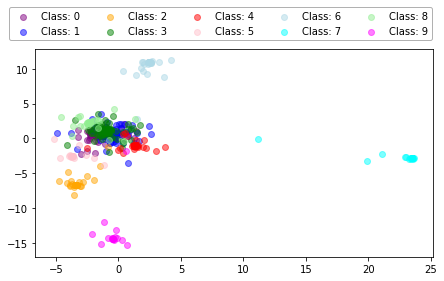

D: 15 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


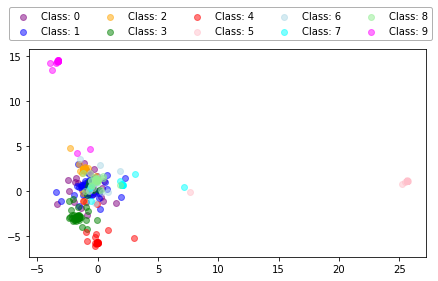

D: 15 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


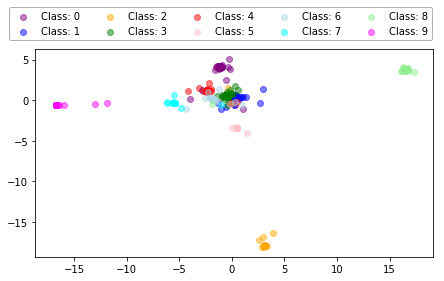

D: 15 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


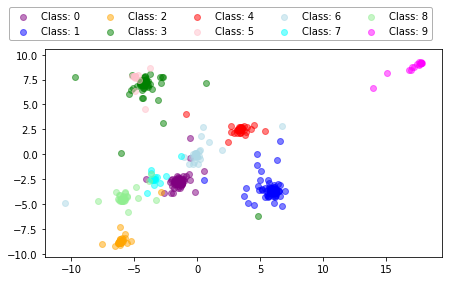

D: 15 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


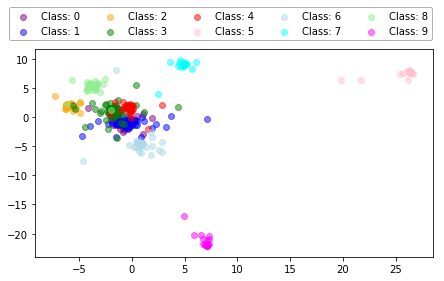

D: 15 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


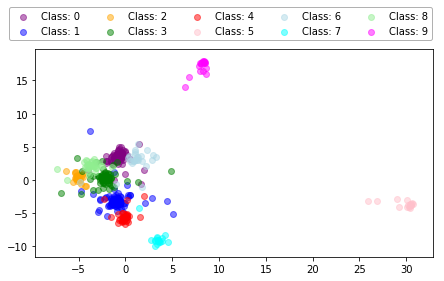

D: 15 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


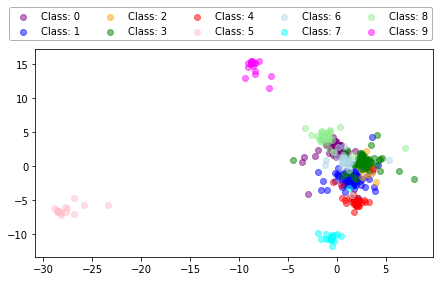

D: 20 C: -1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


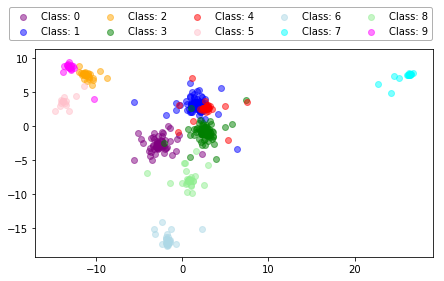

D: 20 C: -0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


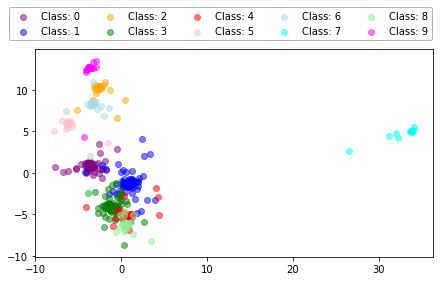

D: 20 C: -0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


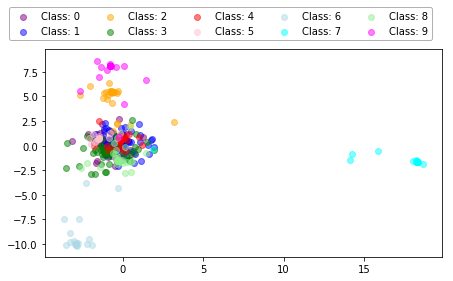

D: 20 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


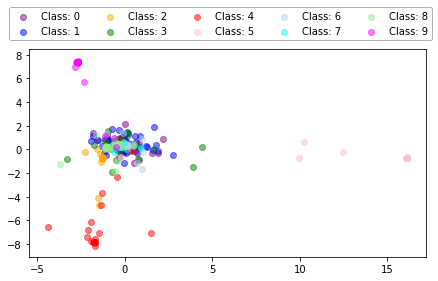

D: 20 C: 0.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


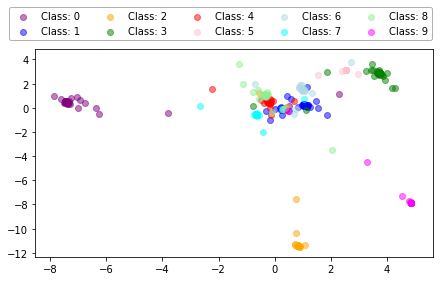

D: 20 C: 0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


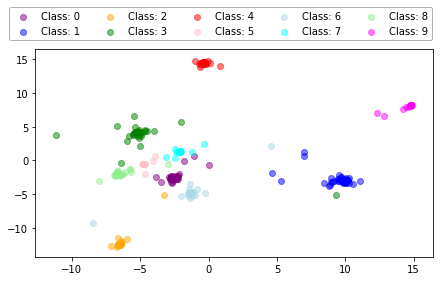

D: 20 C: 0.5
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


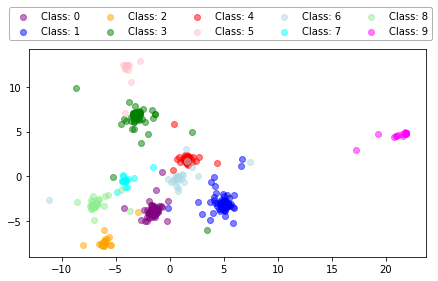

D: 20 C: 0.75
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


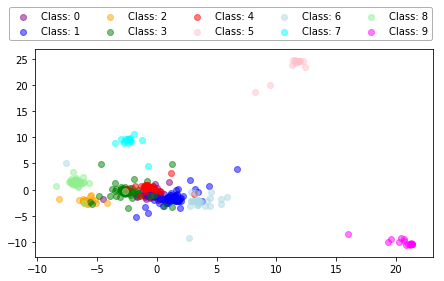

D: 20 C: 1.0
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


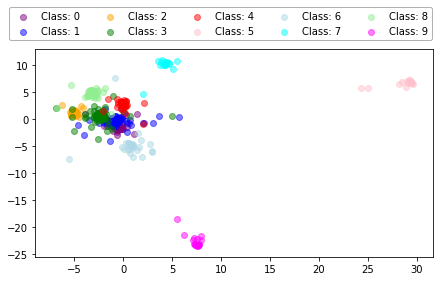

In [391]:
from sklearn.metrics.pairwise import polynomial_kernel
# my_init_X_6_ acc = np.reshape(my_init_X_1, (-1, 2, 5))

my_init_X_6_acc = np.append(my_init_X_1, my_init_X_1, 1)
my_init_X_6_acc = np.reshape(my_init_X_6_acc, (-1, 2, 10))

for d in [3,4,5,6,7,8,9,10, 15, 20]:
    for c in np.linspace(-1, 1, 9):
        print("D: {0} C: {1}".format(d, c))
        my_init_X_6a = polynomial_kernel(X=my_init_X_6_acc[:,0,:], Y=my_init_X_6_acc[:,1,:], degree=d, gamma=None, coef0=c)
        lda_proj(my_init_X_6a, y)

### Clear winner is D=4 and C=-0.25

data shape:  (500, 500)
LDA projected data shape:  (500, 2)


/Users/mateuszochal/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/mateuszochal/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


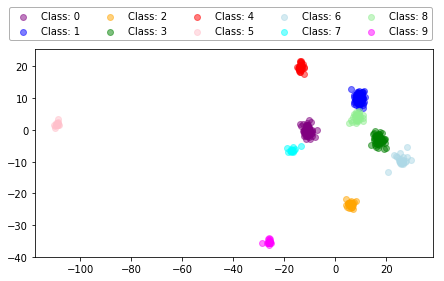

In [393]:
my_init_X_6a = polynomial_kernel(X=my_init_X_6_acc[:,0,:], Y=my_init_X_6_acc[:,1,:], degree=4, gamma=None, coef0=-0.25)
lda_proj(my_init_X_6a, y)

---------
## Categories based on custom policies inspired by findings with K-means

In [448]:
X_end = np.array(selected_results)[1][:,19,:]
X_init = np.array(selected_results)[1][:,0,:]
print(np.shape(X_end), np.shape(X_init))

(500, 10) (500, 10)


In [489]:
labels = ["Other"]
# TFT
labels.append("TFT")
comparison_policy1 = np.array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0])

# TFT without until someone defects
labels.append("C in s0 & CC; D otherwise")
comparison_policy2 = np.array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

# TFT defective start state
labels.append("TFT (D in S0)")
comparison_policy3 = np.array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

# Fully defective
labels.append("All D")
comparison_policy4 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Fully cooperative
labels.append("All C")
comparison_policy5 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# only one agent is TFT
labels.append("unilateral TFT")
comparison_policy6a = np.array([1, 1, 0, 1, 0, 0.5, 0.5, 0.5, 0.5, 0.5])
comparison_policy6b = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 0, 0]) 

tolerance = 0.5
y_2 = []
for x in X_end:
    l = 0
    if np.all(np.abs(x - comparison_policy1) < tolerance):
        l = 1
#     elif np.all(np.abs(x - comparison_policy2) < tolerance):
#         l = 2
    elif np.all(np.abs(x - comparison_policy3) < tolerance):
        l = 3
    elif np.all(np.abs(x - comparison_policy4) < tolerance):
        l = 4
    elif np.all(np.abs(x - comparison_policy5) < tolerance):
        l = 5
    elif np.all(np.abs(x - comparison_policy6a) < tolerance) or np.all(np.abs(x - comparison_policy6b) < tolerance):
        l = 6
    y_2.append(l)

y_2 = np.array(y_2)

PCA projected data shape:  (500, 2)


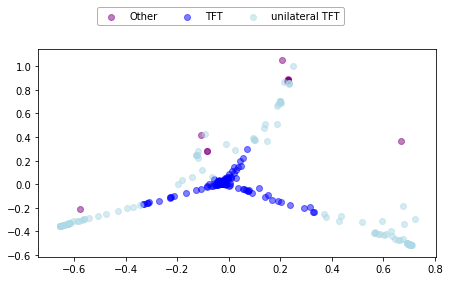

data shape:  (500, 10)
LDA projected data shape:  (500, 2)


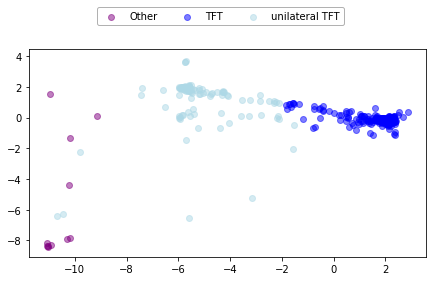

data shape:  (500, 500)
LDA projected data shape:  (500, 2)


/Users/mateuszochal/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


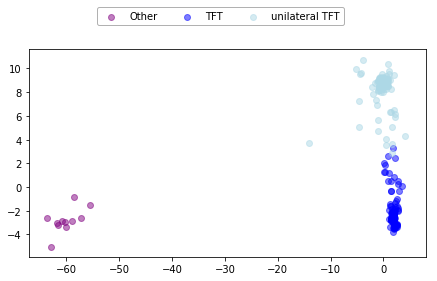

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

In [490]:
X_end_c = np.append(X_end, X_end, 1)
X_end_c = np.reshape(X_end_c, (-1, 2, 10))
ker_X_end = polynomial_kernel(X=X_end_c[:,0,:], Y=X_end_c[:,1,:], degree=3, gamma=None, coef0=-0.25)

pca_proj(X_end, y_2, labels=labels)
lda_proj(X_end, y_2, labels=labels)
lda_proj(ker_X_end, y_2, labels=labels)

data shape:  (500, 10)
LDA projected data shape:  (500, 2)


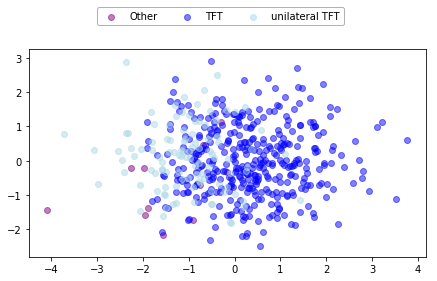

data shape:  (500, 500)
LDA projected data shape:  (500, 2)


/Users/mateuszochal/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


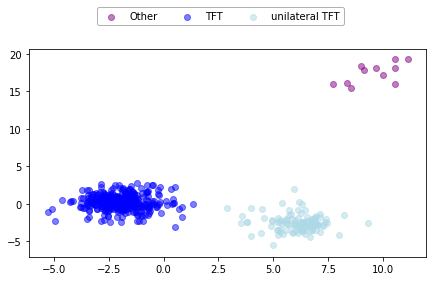

In [465]:
X_init_c = np.append(X_init, X_init, 1)
X_init_c = np.reshape(X_init_c, (-1, 2, 10))
ker_X_init = polynomial_kernel(X=X_init_c[:,0,:], Y=X_init_c[:,1,:], degree=4, gamma=None, coef0=-0.25)

lda_proj(X_init, y_2, labels)
my_lda = lda_proj(ker_X_init, y_2, labels)

D: 1 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


/Users/mateuszochal/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


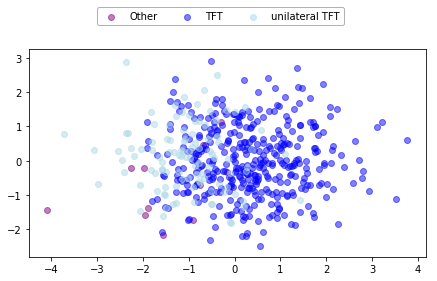

D: 2 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


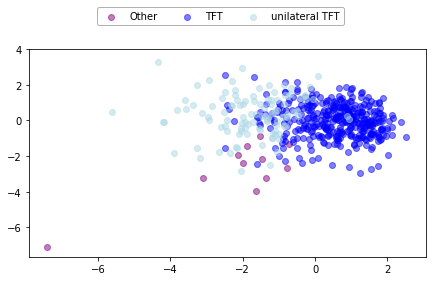

D: 3 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


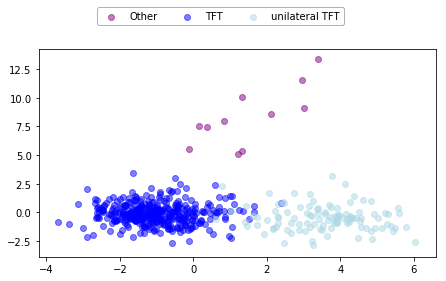

D: 4 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


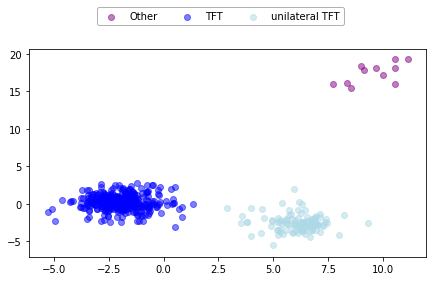

D: 5 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


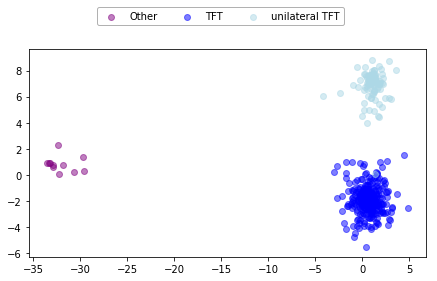

D: 6 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


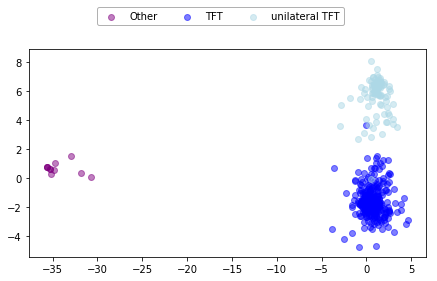

D: 7 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


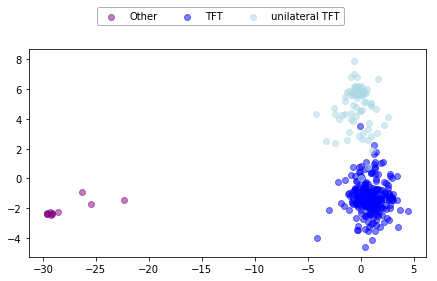

D: 8 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


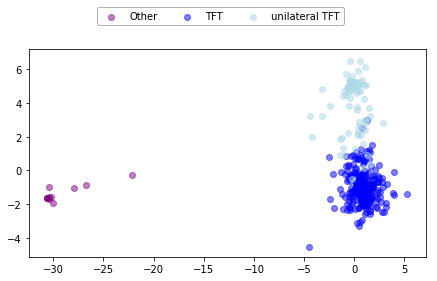

D: 9 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


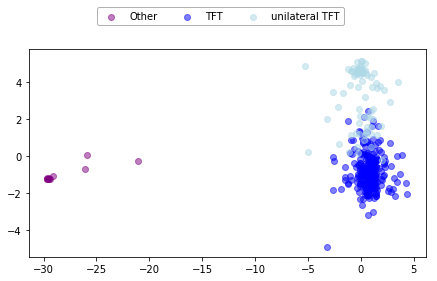

D: 10 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


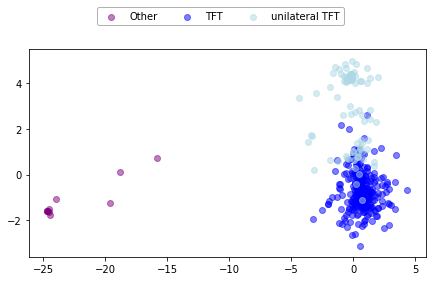

D: 15 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


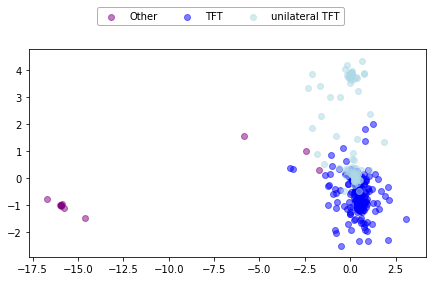

D: 20 C: -0.25
data shape:  (500, 500)
LDA projected data shape:  (500, 2)


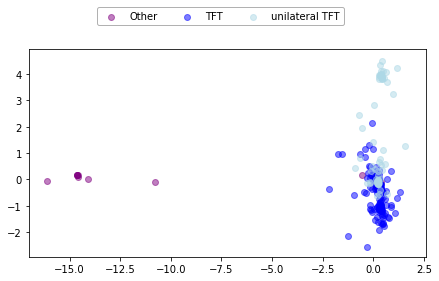

In [452]:
for d in [1,2,3,4,5,6,7,8,9,10, 15, 20]:
    for c in [-0.25]:
        print("D: {0} C: {1}".format(d, c))
        ker_X_init = polynomial_kernel(X=X_init_c[:,0,:], Y=X_init_c[:,1,:], degree=d, gamma=None, coef0=c)
        lda_proj(ker_X_init, y_2, labels)

## The seperation seems to degrade with too high of powers for poly kernel

In [693]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


def plot_1ax_policies_2(X, keys, title, y=None, show=True, figsize=(15, 4), colours=None, filename=None, labels=None, pts=None):
    rows = len(X)
    
    fig, axes = plt.subplots(ncols=rows, nrows=1, sharex=True, sharey=True, figsize=figsize)
    fig.text(0.5, 0.96, title, ha='center', fontsize=14)
    fig.text(0.5, 0.02, 'P(cooperation | state) for agent 0', ha='center', fontsize=12)
    fig.text(0.02, 0.5, 'P(cooperation | state) for agent 1', va='center', rotation='vertical', fontsize=12)
    
    unique_lbls = list(set(list(y.flatten())))

    colors = ["purple", "blue", "orange", "green", "red", "pink", "cyan", "lightgreen", "magenta", "lightblue"]
    cols = [ colors[l] for l in unique_lbls ]
    lbls = ["Class: "+ str(l) if labels is None else labels[l] for l in unique_lbls]
    
    new_y = np.zeros(np.shape(y))
    for i, l in enumerate(unique_lbls):
        new_y[np.where(y == l)] = i
    
    state = ["s0", "CC", "CD", "DC", "DD"]
    n_bin = len(unique_lbls)
    cmap_name = 'my_list'
    cm = LinearSegmentedColormap.from_list(cmap_name, cols, N=n_bin)

    for r, ax in enumerate(axes):
        
        for l in unique_lbls:
            label = "Class: "+ str(l) if labels is None else labels[l]
            x = X[r][np.where(y[r, :] == l)]
            ax.scatter(x[:, 0, r], x[:, 1, r], c=colors[l], alpha=1, label=label)
            
        x1 = np.linspace(0, 1, pts)
        x2 = np.linspace(0, 1, pts)
        X1, X2 = np.meshgrid(x1, x2)
        z = np.reshape(new_y[r], (pts,pts))
        ax.imshow(z.T, interpolation='nearest', origin='lower', cmap=cm, alpha=0.8,
                  extent=[0-0.5/pts, 1+0.5/pts, 0-0.5/pts, 1+0.5/pts], vmax=len(unique_lbls), vmin=-1)
            
        ax.set_title(state[r], fontsize=11)

    plt.subplots_adjust(left=0.07, right=0.99, top=0.80, bottom=0.18, wspace=0.07, hspace=0.27)
    handles, labels = ax.get_legend_handles_labels()

    legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.51, 0.95), ncol=10, borderaxespad=0, fancybox=True)
    frame = legend.get_frame()
    frame.set_edgecolor('black')
    frame.set_alpha(0.3)
    
    plt.show()

In [694]:
import copy

def plot_strategy_plot(init_policy, pts = 20):
    print(init_policy)
    
    idx = [(i, i+5) for i in range(5)]
    test_X = np.zeros((len(idx), pts, pts, 10))*0.0
    arange = np.linspace(0, 1, pts)
    
    for k, (idx_0, idx_1) in enumerate(idx):
        for i, x1 in enumerate(arange):
            for j, x2 in enumerate(arange):
                test_X[k][i][j] = copy.copy(init_policy)
                test_X[k][i][j][idx_0] = x1
                test_X[k][i][j][idx_1] = x2
    
    test_X_c = np.reshape(test_X, (-1, 10))
    ker_test_X = polynomial_kernel(X=test_X_c, Y=X_init_c[:,1,:], degree=4, gamma=None, coef0=-0.25)
    new_y = my_lda.predict(ker_test_X)
    new_y = np.reshape(new_y, (-1, pts*pts))
    test_X_d = np.reshape(test_X, (-1, pts*pts, 2, 5))

    plot_1ax_policies_2(test_X_d, ["after 1000 runs totally random init"], "init X", new_y, labels=labels,pts=pts)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


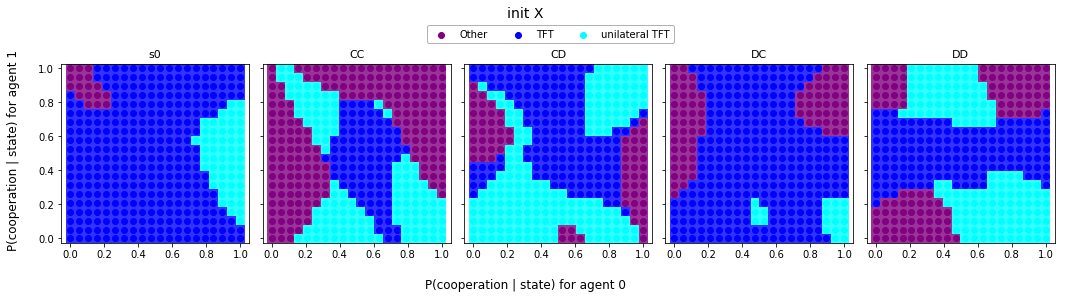

[0.29055601 0.15106934 0.9079541  0.14063982 0.1188293  0.11286883
 0.0817816  0.89998559 0.444889   0.60596721]


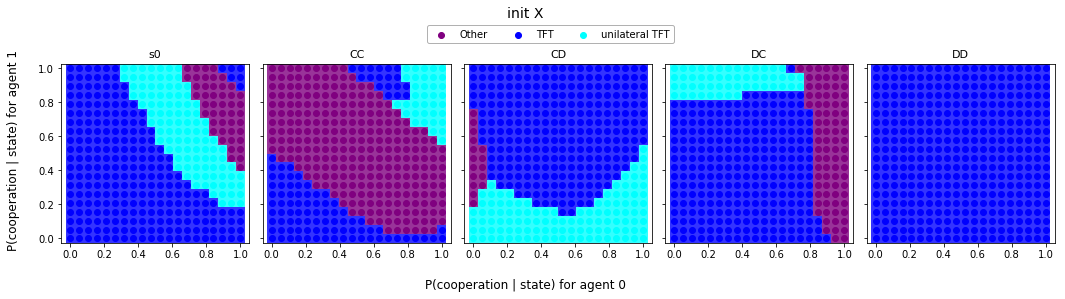

[0.01586749 0.36582388 0.32089307 0.43058716 0.90902302 0.51331389
 0.76436667 0.01898069 0.15049645 0.70602415]


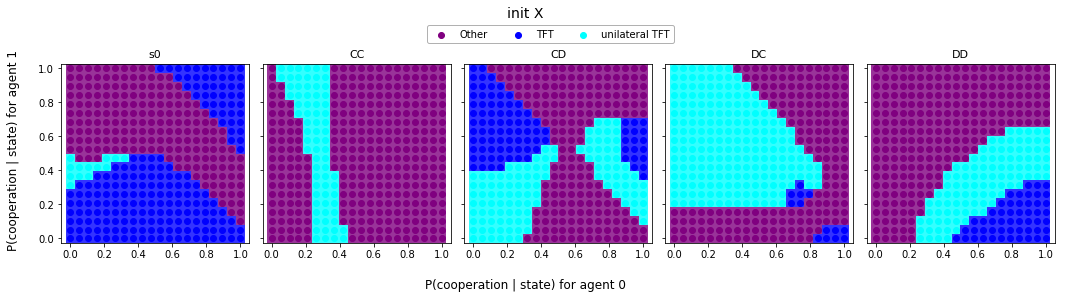

[0.53305775 0.0670632  0.71464386 0.35304968 0.00143783 0.34980598
 0.22113118 0.88249912 0.99783331 0.08079488]


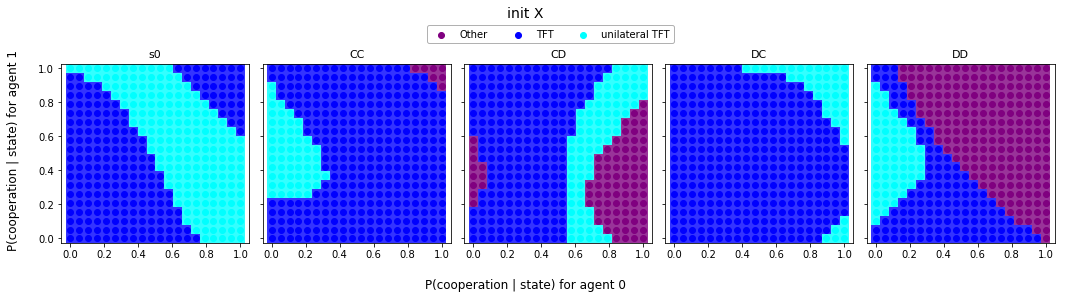

[0.02757905 0.94712294 0.20910894 0.79564535 0.61248835 0.5687267
 0.92957979 0.06556318 0.76237229 0.72956148]


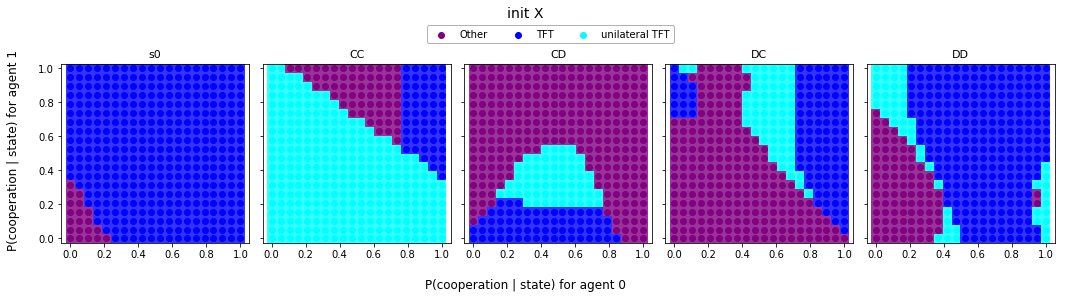

[0.55738199 0.4253336  0.71888234 0.91119887 0.64421609 0.63935308
 0.15463644 0.06566177 0.07455591 0.28653926]


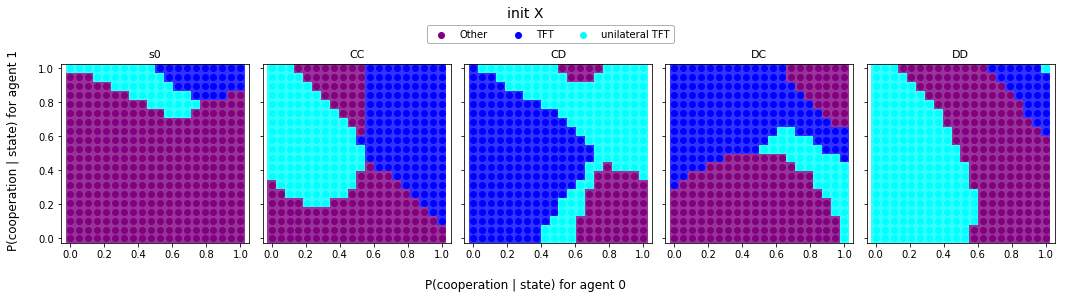

[0.86390993 0.3723973  0.68321864 0.9942094  0.78489085 0.45015714
 0.34534517 0.32179156 0.40262888 0.9428689 ]


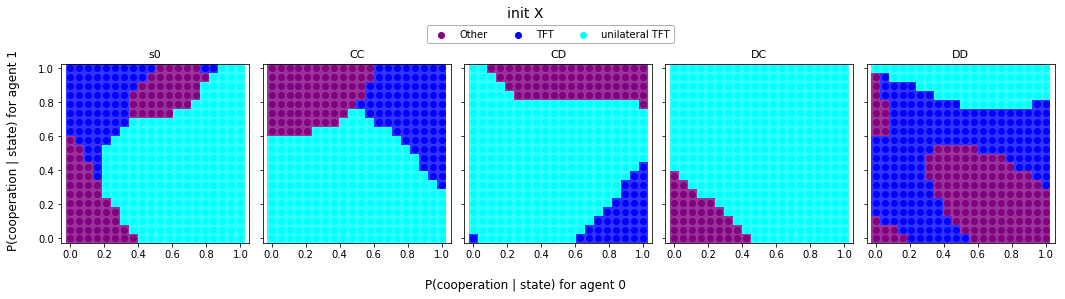

[0.72460272 0.88204979 0.58054877 0.60355173 0.86752766 0.77375013
 0.55413096 0.97489848 0.29865127 0.59745766]


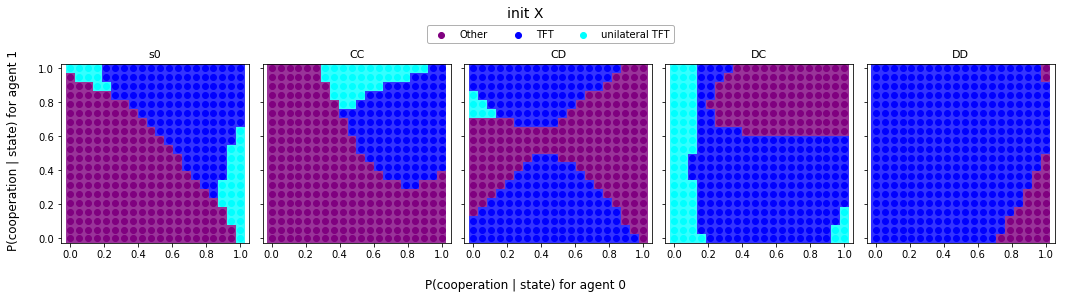

[0.82091156 0.96027729 0.7684481  0.95740793 0.32058755 0.76818382
 0.85512561 0.18715379 0.93065211 0.0536776 ]


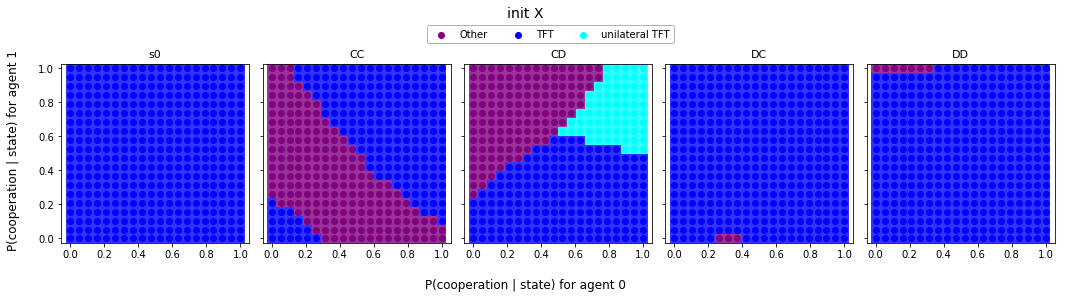

[0.68345271 0.74504406 0.49413049 0.59729349 0.83622225 0.10359556
 0.92282004 0.02047977 0.21888437 0.13580773]


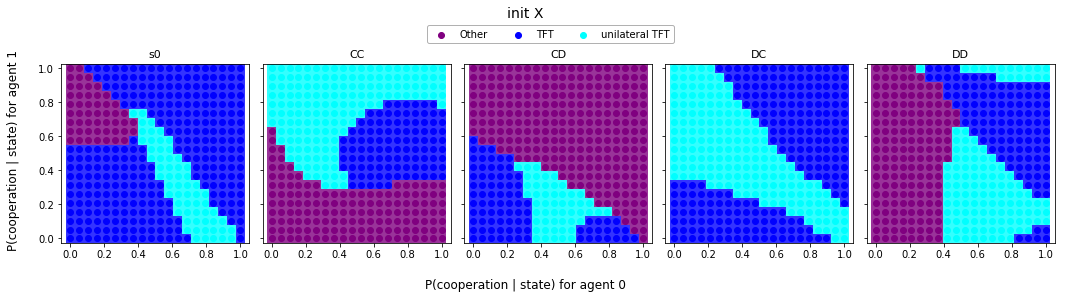

[0.5970365  0.62558078 0.31608357 0.34568047 0.27844761 0.6541591
 0.80831467 0.75290281 0.09662544 0.73192649]


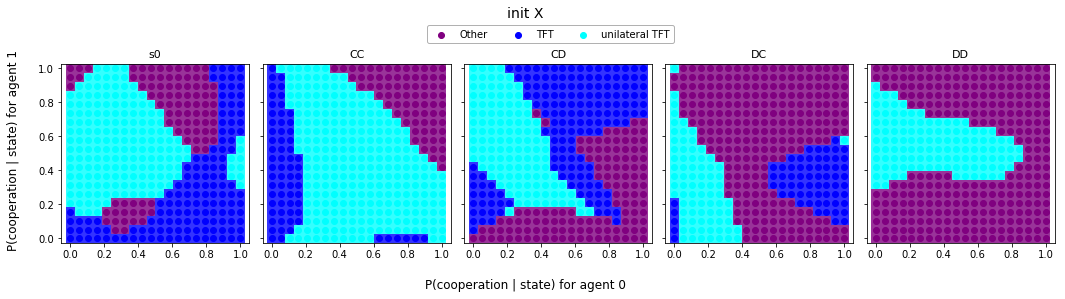

In [697]:
pts = 20

init_policy = np.ones((10))*0.5
plot_strategy_plot(init_policy, pts)

for i in range(10):
    random_policy = np.random.random((10))
    plot_strategy_plot(random_policy, pts)

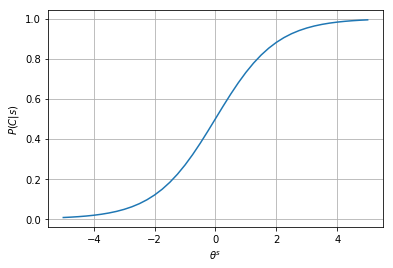

In [717]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 41)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel(r'$\theta^s$')
plt.ylabel(r'$P(C|s)$')
plt.grid(True)
plt.show()